# Análisis y Curación de datos - Feature Engineering

## Importación de librerías

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos 

In [12]:
data = pd.read_csv("loan.csv")

In [13]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## Recategorización de variables

In [14]:
data['occupation'].unique()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [15]:
data['occupation'].value_counts()

Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: occupation, dtype: int64

In [30]:
dic_occupation = {'engineer': ['Engineer'],
                  'pilot':['Pilot'],
                  'lawyer':['Lawyer'],
                  'language': ['Editor','Writer','Researcher'],
                  'gastronomy' : ['Chef','Server'],
                  'marketing and sales': ['Salesman', 'Marketing', 'Sales'],
                  'art': ['Musician','Artist','Stylist','Photographer'],
                  'architecture': ['Architect', 'Designer','Electrician'],
                  'it': ['IT','Programmer','Software','Analyst','HR'],
                  'health': ['Dentist','Pharmacist','Psychologist','Doctor','Nurse','Veterinarian'],
                  'education': ['Teacher','Professor','Student'],
                  'administration and finance' : ['Manager', 'Accountant','Consultant', 'Realtor','Receptionist','Banker']
}

In [32]:
data['new_occupation']= data['occupation']
for i in dic_occupation:
    data['new_occupation'] = data['new_occupation'].replace(dic_occupation[i], i)
data[['occupation','new_occupation']].sample(5)

,occupation,new_occupation
52,Engineer,engineer
27,HR,it
37,Server,gastronomy
42,Manager,administration and finance
51,Designer,architecture


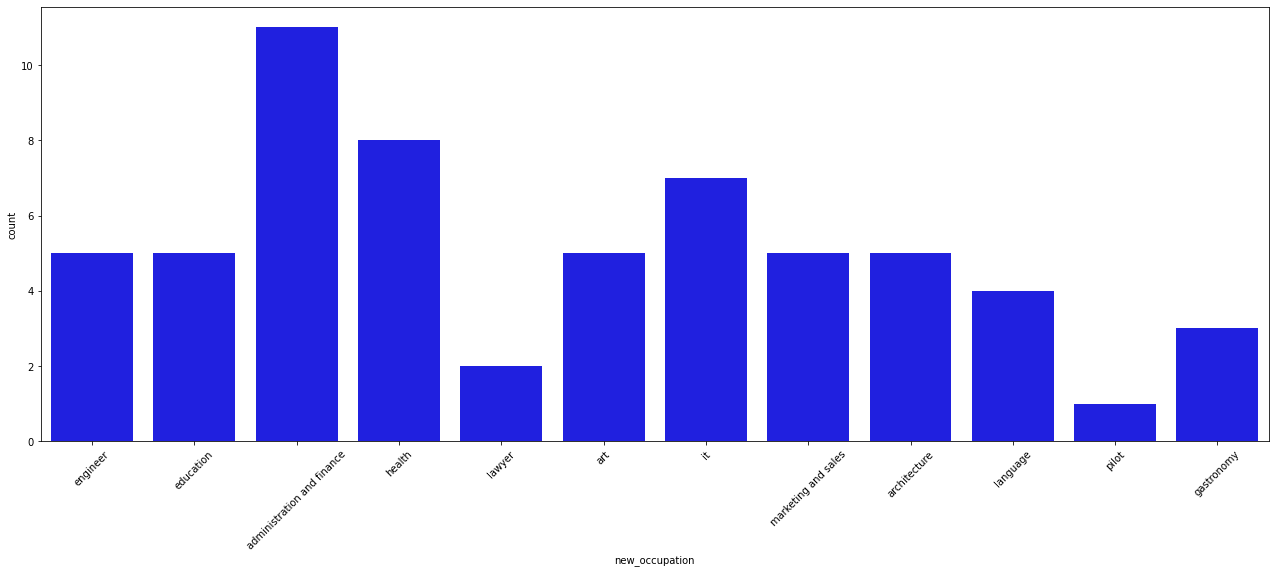

In [36]:
fig = plt.figure(figsize=(22,8))
sns.countplot(data=data, x='new_occupation',
                color='blue')
plt.xticks(rotation=45)
#plt.ylabel("Conteo de observaciones por periodo")
#plt.xlabel("Periodo")
plt.ticklabel_format(style='plain', axis='y')

## Creación de rangos

In [50]:
data.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status', 'new_occupation',
       'new_decision_medica_2'],
      dtype='object')

In [52]:
data['income'].describe()

count        61.000000
mean      78983.606557
std       33772.025802
min       25000.000000
25%       52000.000000
50%       78000.000000
75%       98000.000000
max      180000.000000
Name: income, dtype: float64

In [55]:
def to_categorical(column, bin_size=10000, min_cut=20000, max_cut=70000):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [56]:
data['new_income'] = to_categorical(data.income)

[(20000, 30000), (30000, 40000), (40000, 50000), (50000, 60000), (60000, 70000), (70000, 180000)]
